### Задание 

Необходимо взять не менее 100 значений и разбить их на 2 выборки (80/20) и использовать первые 80 значений для обучения моделей:
- методом МНК (квадратичная гипотеза), 
<!-- - методом kNN,  -->
- методом SVM, 
- методом Lasso, 
- методом PLS. 

Использовать не менее 2-х параметров для прогнозирования целевого параметра. Добавить к параметрам из варианта, значения целевого параметра со сдвигом на один шаг в прошлое (отставание от прогнозируемого значения на один шаг). Построить графики получаемых с использованием построенных моделей функций и нанести значения из тренировочной и тестовой выборок.

Построить графики получаемых с использованием построенных моделей функций и нанести значения из тренировочной и тестовой выборок.

(ВСЕ вышеперечисленное вы должны были сделать в рамках 5-ого задания)
________________________________________________________________________________________
Построить боксплоты для сопоставления  тестовой выборки и прогноза.

Проверить адекватность полученных моделей с помощью критериев: Хи-квадрат, Фишера, Стьюдента.

Произвести выбор модели на основе полученных результатов.


### Данные
* DataSet5_1 – «Динамика цен на основные социально значимые продовольственные товары в розничной сети Свердловской области» (данные сортированы по следующим столбцам:   
1) Дата мониторинга;   
2) кура охлажденная и мороженая. руб./кг;  
3) молоко цельное питьевое 2.5-3.2% жирности. руб./л.;  
4) мука пшеничная в/с. руб./кг;   
5) хлеб и булочные изделия из пшеничной муки 1 и 2 с.. руб./кг;  
6) яйцо куриное. руб./дес.;  
7) картофель. руб./кг.
* DataSet5_2 – Данные об аренде велосипедов
* DataSet1_3 – Стоимость и объем продаж акций компании Google 
* DataSet1_4 – статистика заболеваемости COVID-19 по странам

### Подключаем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Читаем файл данных 

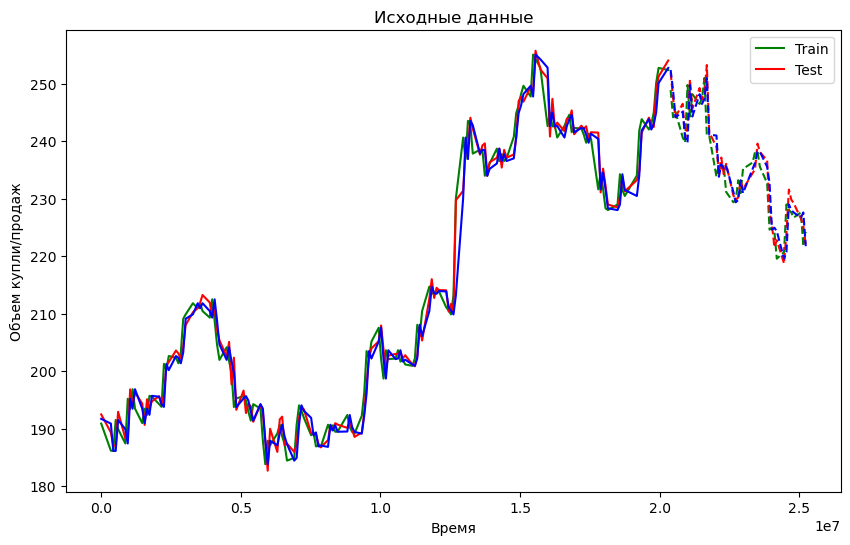

In [2]:
data1 = pd.read_csv('DataSet1_3.csv', sep = ',')
data2 = pd.read_csv('DataSet1_4.csv', sep = ',')

data3 = pd.read_csv('DataSet5_1.csv', sep = ',')
data4 = pd.read_csv('DataSet5_2.csv', sep = ',')

data1[["Date"]] = data1[["Date"]].apply(pd.to_datetime)
data1['Date'] =   (data1['Date']).astype(np.int64)/1000000000 #нс -> c

start_idx = 100
end_idx = 300

data = pd.DataFrame()
data['x'] = data1['Date'][start_idx:end_idx].to_numpy() - data1['Date'][start_idx] + 1
data['y'] = data1['Close'][start_idx:end_idx].to_numpy()
data['p1'] = data1['Open'][start_idx:end_idx].to_numpy()
data['p2'] = data1['Close'][start_idx-1:end_idx-1].to_numpy()

n = round(0.8*(end_idx - start_idx))

train = data[0:n]
test = data[n:]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train['x'], train['y'], color='green', linestyle = 'solid')
ax.plot(train['x'], train['p1'], color='red', linestyle = 'solid')
ax.plot(train['x'], train['p2'], color='blue', linestyle = 'solid')
ax.plot(test['x'], test['y'], color='green', linestyle = 'dashed')
ax.plot(test['x'], test['p1'], color='red', linestyle = 'dashed')
ax.plot(test['x'], test['p2'], color='blue', linestyle = 'dashed')

ax.set(title="Исходные данные", xlabel="Время", ylabel="Объем купли/продаж")

ax.legend(['Train', 'Test'])
plt.show()

In [3]:
train_x = train.drop(['y'], axis=1, inplace=False)
train_y = train['y']
test_x = test.drop(['y'], axis=1, inplace=False)
test_y = test['y']

## МНК

In [4]:
from scipy.optimize import curve_fit 

def mapping_func(x, a, b, c, b1, b2): 
    return a + b * x['x'] + c * x['x']**2 + b1 * x['p1'] + b2 * x['p2']

args, covar = curve_fit(mapping_func, train_x, train_y)

a, b, c, b1, b2 = args[0], args[1], args[2], args[3], args[4]

mnk_res_y_tr = a + b * train['x'] + c * train['x']**2 + b1 * train['p1'] + b2 * train['p2']
mnk_res_y_ts = a + b * test['x'] + c * test['x']**2 + b1 * test['p1'] + b2 * test['p2']

### Графики

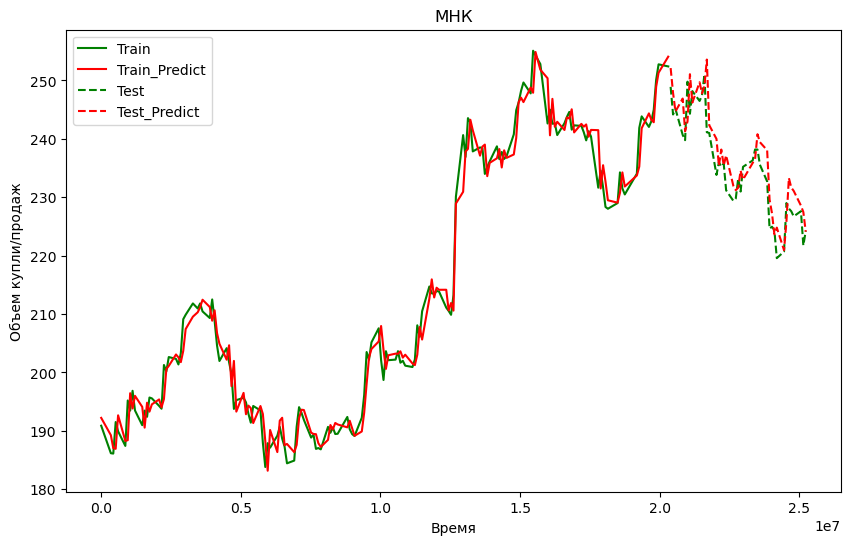

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train['x'], train['y'], color='green', linestyle = 'solid')
ax.plot(train['x'], mnk_res_y_tr, color='red', linestyle = 'solid')
ax.plot(test['x'], test['y'], color='green', linestyle = 'dashed')
ax.plot(test['x'], mnk_res_y_ts, color='red', linestyle = 'dashed')

ax.set(title="МНК", xlabel="Время", ylabel="Объем купли/продаж")

ax.legend(['Train', 'Train_Predict', 'Test', 'Test_Predict'])
plt.show()

### Использование Box-диаграмм для сопоставления тестовой выборки и прогноза 

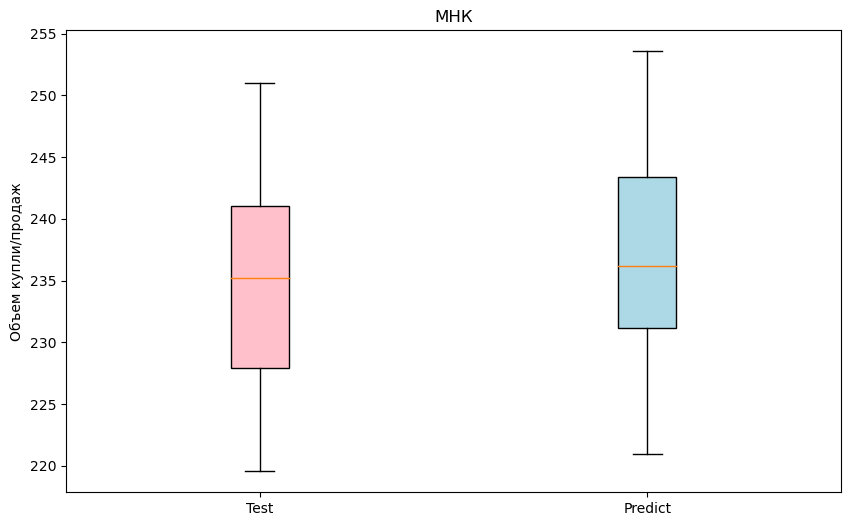

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

labels = ['Test', 'Predict']
colors = ['pink', 'lightblue']

bplot = ax.boxplot([test['y'], mnk_res_y_ts], patch_artist=True, labels = labels)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set(title="МНК",  ylabel="Объем купли/продаж")

plt.show()

### Критерий Хи-квадрат

In [7]:
stats.chisquare(test['y'], np.sum(test['y'])/np.sum(mnk_res_y_ts) * mnk_res_y_ts)

Power_divergenceResult(statistic=2.0041406177616126, pvalue=1.0)

### Критерий Фишера

In [8]:
var1 = np.var(test['y'], ddof=1)
var2 = np.var(mnk_res_y_ts, ddof=1)

f_value = var1 / var2

df1 = len(test['y']) - 1
df2 = len(mnk_res_y_ts) - 1

p_value = stats.f.cdf(f_value, df1, df2)
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 39
Degree of freedom 2: 39
F-statistic: 0.9980252704221065
p-value: 0.4975534011147262


### Критерий Стьюдента

In [10]:
stats.ttest_ind(test['y'], mnk_res_y_ts)

Ttest_indResult(statistic=-1.0812797360107924, pvalue=0.28290445983997625)

## SVR

In [11]:
from sklearn.svm import SVR

In [12]:
model = SVR(kernel = 'rbf')
model.fit(train_x, train_y)

SVR()

In [13]:
svr_res_y_tr = model.predict(train_x)
svr_res_y_ts = model.predict(test_x)

### Графики

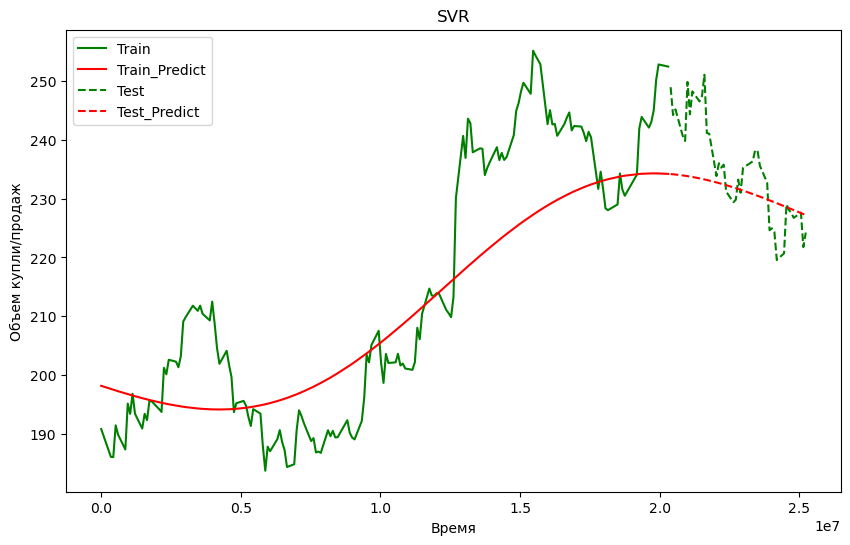

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train['x'], train['y'], color='green', linestyle = 'solid')
ax.plot(train['x'], svr_res_y_tr, color='red', linestyle = 'solid')
ax.plot(test['x'], test['y'], color='green', linestyle = 'dashed')
ax.plot(test['x'], svr_res_y_ts, color='red', linestyle = 'dashed')

ax.set(title="SVR", xlabel="Время", ylabel="Объем купли/продаж")

ax.legend(['Train', 'Train_Predict', 'Test', 'Test_Predict'])
plt.show()

### Использование Box-диаграмм для сопоставления тестовой выборки и прогноза 

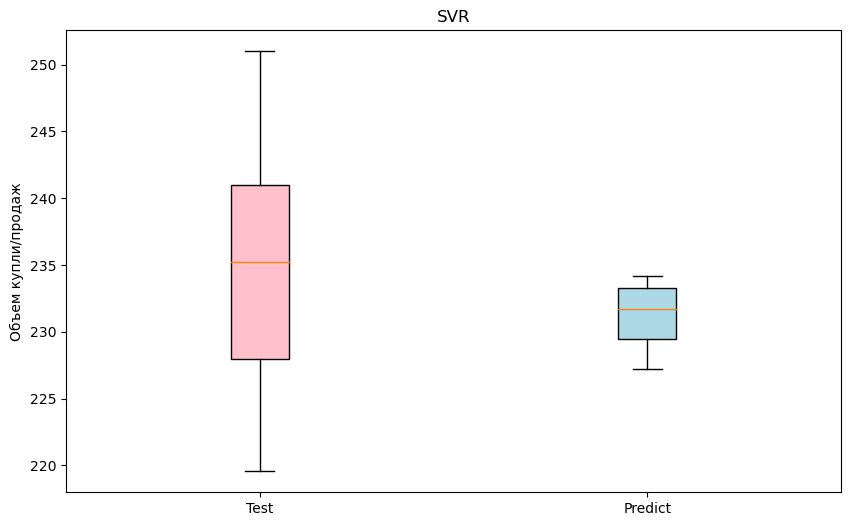

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

labels = ['Test', 'Predict']
colors = ['pink', 'lightblue']

bplot = ax.boxplot([test['y'], svr_res_y_ts], patch_artist=True, labels = labels)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set(title="SVR",  ylabel="Объем купли/продаж")

plt.show()

### Критерий Хи-квадрат

In [16]:
stats.chisquare(test['y'], np.sum(test['y'])/np.sum(svr_res_y_ts) * svr_res_y_ts)

Power_divergenceResult(statistic=7.9677941808164405, pvalue=0.9999999783402838)

### Критерий Фишера

In [17]:
var1 = np.var(test['y'], ddof=1)
var2 = np.var(svr_res_y_ts, ddof=1)

f_value = var1 / var2

df1 = len(test['y']) - 1
df2 = len(svr_res_y_ts) - 1

p_value = stats.f.cdf(f_value, df1, df2)
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 39
Degree of freedom 2: 39
F-statistic: 15.655125434429115
p-value: 0.9999999999999822


### Критерий Стьюдента

In [18]:
stats.ttest_ind(test['y'], svr_res_y_ts)

Ttest_indResult(statistic=2.572588078314891, pvalue=0.01199195171049961)

## Lasso

In [19]:
from sklearn.linear_model import Lasso

In [20]:
# https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/
lasso_model = Lasso(alpha=1)
lasso_model.fit(train_x, train_y)
# Lasso(alpha=1)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.487e+02, tolerance: 7.747e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [21]:
lasso_res_y_tr = lasso_model.predict(train_x)
lasso_res_y_ts = lasso_model.predict(test_x)

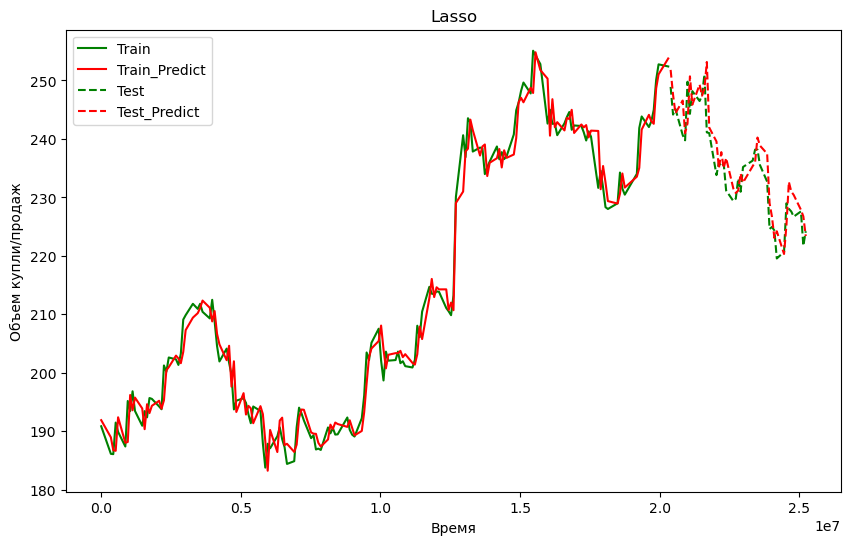

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train['x'], train['y'], color='green', linestyle = 'solid')
ax.plot(train['x'], lasso_res_y_tr, color='red', linestyle = 'solid')
ax.plot(test['x'], test['y'], color='green', linestyle = 'dashed')
ax.plot(test['x'], lasso_res_y_ts, color='red', linestyle = 'dashed')

ax.set(title="Lasso", xlabel="Время", ylabel="Объем купли/продаж")

ax.legend(['Train', 'Train_Predict', 'Test', 'Test_Predict'])
plt.show()

### Использование Box-диаграмм для сопоставления тестовой выборки и прогноза 

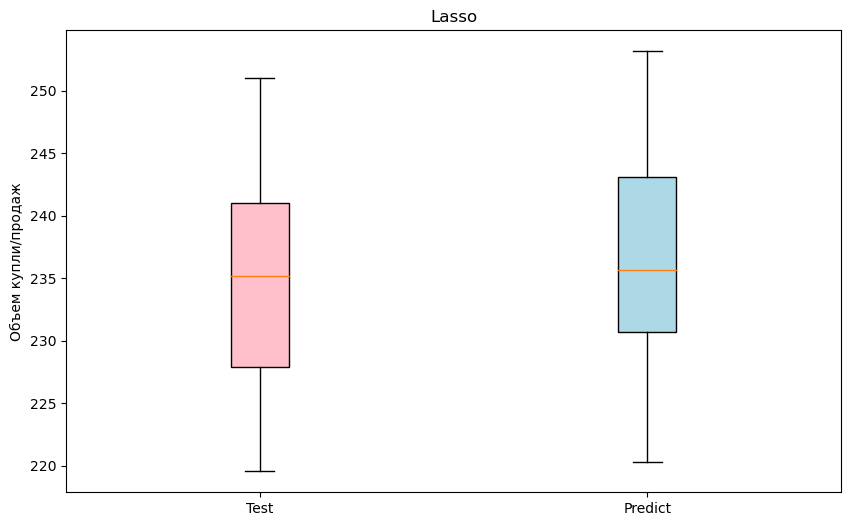

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

labels = ['Test', 'Predict']
colors = ['pink', 'lightblue']

bplot = ax.boxplot([test['y'], lasso_res_y_ts], patch_artist=True, labels = labels)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set(title="Lasso",  ylabel="Объем купли/продаж")

plt.show()

### Критерий Хи-квадрат

In [24]:
stats.chisquare(test['y'], np.sum(test['y'])/np.sum(lasso_res_y_ts) * lasso_res_y_ts)

Power_divergenceResult(statistic=1.9958701421016403, pvalue=1.0)

### Критерий Фишера

In [25]:
var1 = np.var(test['y'], ddof=1)
var2 = np.var(lasso_res_y_ts, ddof=1)

f_value = var1 / var2

df1 = len(test['y']) - 1
df2 = len(lasso_res_y_ts) - 1

p_value = stats.f.cdf(f_value, df1, df2)
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 39
Degree of freedom 2: 39
F-statistic: 0.9767502969688271
p-value: 0.47090931401275565


### Критерий Стьюдента

In [26]:
stats.ttest_ind(test['y'], lasso_res_y_ts)

Ttest_indResult(statistic=-0.8308635647900953, pvalue=0.4085868228079591)

## PLS

In [27]:
from sklearn.cross_decomposition import PLSRegression
# from sklearn.model_selection import cross_val_predict

In [28]:
# https://nirpyresearch.com/partial-least-squares-regression-python/
pls = PLSRegression(n_components=3)
pls.fit(train_x, train_y)

PLSRegression(n_components=3)

In [34]:
pls_res_y_tr = pls.predict(train_x)
pls_res_y_tr = np.array([i[0] for i in pls_res_y_tr], dtype=np.int64)
pls_res_y_ts = pls.predict(test_x)
pls_res_y_ts = np.array([i[0] for i in pls_res_y_ts], dtype=np.int64)

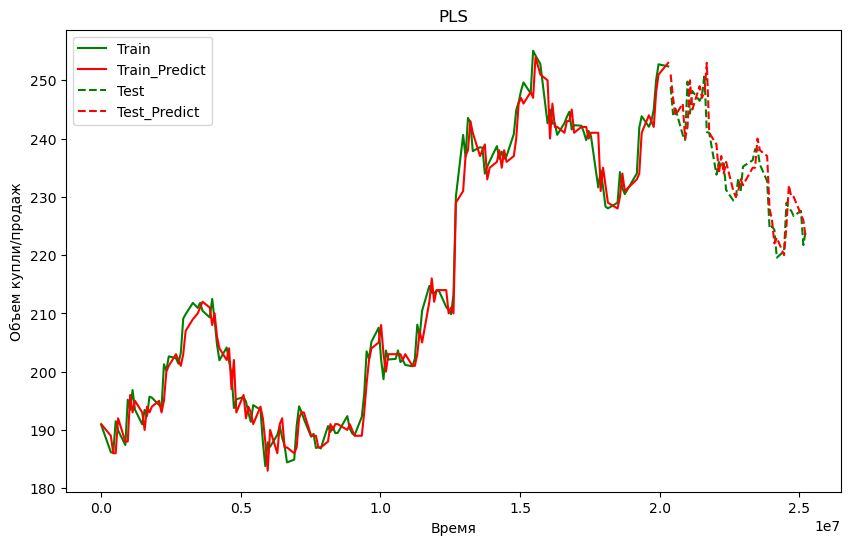

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train['x'], train['y'], color='green', linestyle = 'solid')
ax.plot(train['x'], pls_res_y_tr, color='red', linestyle = 'solid')
ax.plot(test['x'], test['y'], color='green', linestyle = 'dashed')
ax.plot(test['x'], pls_res_y_ts, color='red', linestyle = 'dashed')

ax.set(title="PLS", xlabel="Время", ylabel="Объем купли/продаж")

ax.legend(['Train', 'Train_Predict', 'Test', 'Test_Predict'])
plt.show()

### Использование Box-диаграмм для сопоставления тестовой выборки и прогноза 

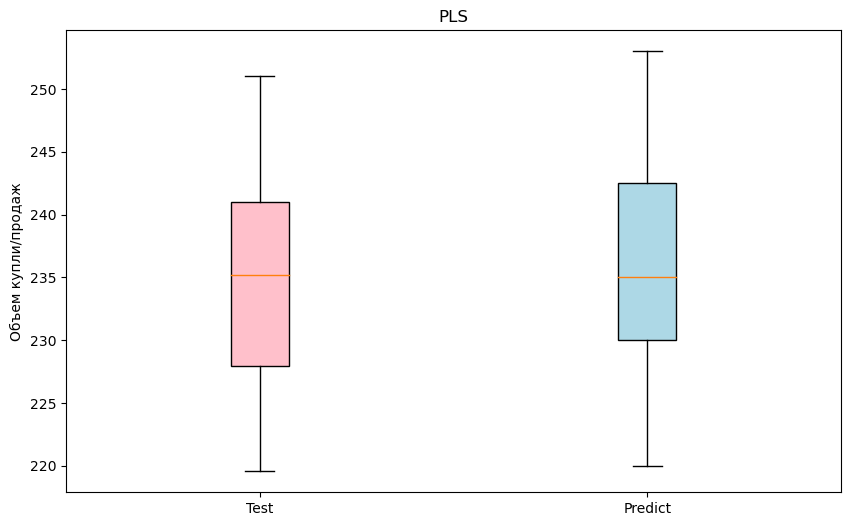

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

labels = ['Test', 'Predict']
colors = ['pink', 'lightblue']

bplot = ax.boxplot([test['y'], pls_res_y_ts], patch_artist=True, labels = labels)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set(title="PLS",  ylabel="Объем купли/продаж")

plt.show()

### Критерий Хи-квадрат

In [37]:
stats.chisquare(test['y'], np.sum(test['y'])/np.sum(pls_res_y_ts) * pls_res_y_ts)

Power_divergenceResult(statistic=2.0127742211851487, pvalue=1.0)

### Критерий Фишера

In [38]:
var1 = np.var(test['y'], ddof=1)
var2 = np.var(pls_res_y_ts, ddof=1)

f_value = var1 / var2

df1 = len(test['y']) - 1
df2 = len(pls_res_y_ts) - 1

p_value = stats.f.cdf(f_value, df1, df2)
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 39
Degree of freedom 2: 39
F-statistic: 0.9637547858666291
p-value: 0.4544057084901155


### Критерий Стьюдента

In [39]:
stats.ttest_ind(test['y'], pls_res_y_ts)

Ttest_indResult(statistic=-0.49189400976973524, pvalue=0.6241757980419265)